In [78]:
import pandas as pd
import numpy as np
from postprocessing import convert_price
import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)

In [2]:
data = pd.read_csv('results_20170107_20200229.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82352 entries, 0 to 82351
Data columns (total 9 columns):
address          82352 non-null object
agent            53979 non-null object
date             82352 non-null object
domain_link      82352 non-null object
outcome_price    82352 non-null object
outcome_sold     82352 non-null object
property_beds    82150 non-null object
property_type    82352 non-null object
suburb_name      82352 non-null object
dtypes: object(9)
memory usage: 5.7+ MB


It looks like most of the columns have all non-null values. The `agent` are not always available (only 54K out of 82K records). The property_beds are almost always available, but it will be worth having a look at the null cases. In anycase, this happens to only 0.25% of the records, so it might be more convenient to just drop these.

Some simple processing steps that can be done to make the data easier to work with:

1. Convert all prices to numerical values. Some of them are expressed in k, in m.
1. Convert the number of beds to numerical values
1. Convert the date to datetime

In [5]:
data.head(10)

,address,agent,date,domain_link,outcome_price,outcome_sold,property_beds,property_type,suburb_name
0,55/84 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/55-84-trenerry-cresc...,$570k,Sold prior to auction,1 bed,Unit,Abbotsford
1,7/2A Mollison St,NaN,2018-04-07,https://www.domain.com.au/7-2a-mollison-street...,$1.27m,Sold,2 beds,Townhouse,Abbotsford
2,204/120 Gipps St,NaN,2018-04-07,https://www.domain.com.au/204-120-gipps-street...,$500k,Private exchange,2 beds,Unit,Abbotsford
3,29 Raphael St,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/29-raphael-street-ab...,$775k,Private exchange,1 bed,House,Abbotsford
4,504/12 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/504-12-trenerry-cres...,$425k,Private exchange,1 bed,Unit,Abbotsford
5,206/11 Flockhart St,_CBRE - Central Square,2018-04-07,https://www.domain.com.au/206-11-flockhart-str...,$411k,Private exchange,2 beds,Unit,Abbotsford
6,B802/10 Trenerry Cr,NaN,2018-04-07,https://www.domain.com.au/b802-10-trenerry-cre...,$527k,Private exchange,2 beds,Unit,Abbotsford
7,610/10 Trenerry Cr,NaN,2018-04-07,https://www.domain.com.au/610-10-trenerry-cres...,$433k,Private exchange,1 bed,Unit,Abbotsford
8,3 Beatles Ct,CBRE Australia 108,2018-04-07,https://www.domain.com.au/3-beatles-court-aire...,$985k,Private exchange,3 beds,House,Aireys Inlet
9,9 Green St,NaN,2018-04-07,https://www.domain.com.au/9-green-street-airpo...,$980k,Sold,3 beds,House,Airport West


# Further cleaning

## Converting prices

In [6]:
def convert_price(price):
    if price is None or price == "-1":
        return -1
    elif price == "Price withheld":
        return 0
    else:
        if 'm' in price:
            factor = 1e6
        elif 'k' in price:
            factor = 1e3

        price = float(price[1:-1])*factor

    return price

In [7]:
data['outcome_price'] = data.apply(lambda x: convert_price(x['outcome_price']),axis=1)

In [8]:
data.head()

,address,agent,date,domain_link,outcome_price,outcome_sold,property_beds,property_type,suburb_name
0,55/84 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/55-84-trenerry-cresc...,570000.0,Sold prior to auction,1 bed,Unit,Abbotsford
1,7/2A Mollison St,NaN,2018-04-07,https://www.domain.com.au/7-2a-mollison-street...,1270000.0,Sold,2 beds,Townhouse,Abbotsford
2,204/120 Gipps St,NaN,2018-04-07,https://www.domain.com.au/204-120-gipps-street...,500000.0,Private exchange,2 beds,Unit,Abbotsford
3,29 Raphael St,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/29-raphael-street-ab...,775000.0,Private exchange,1 bed,House,Abbotsford
4,504/12 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/504-12-trenerry-cres...,425000.0,Private exchange,1 bed,Unit,Abbotsford


## Converting numbers of beds

In [11]:
data.dropna(subset=['property_beds'],inplace=True)

In [15]:
data['property_beds'] = data.apply(lambda x:int(x['property_beds'].split()[0]),axis=1)

In [16]:
data

,address,agent,date,domain_link,outcome_price,outcome_sold,property_beds,property_type,suburb_name
0,55/84 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/55-84-trenerry-cresc...,570000.0,Sold prior to auction,1,Unit,Abbotsford
1,7/2A Mollison St,NaN,2018-04-07,https://www.domain.com.au/7-2a-mollison-street...,1270000.0,Sold,2,Townhouse,Abbotsford
2,204/120 Gipps St,NaN,2018-04-07,https://www.domain.com.au/204-120-gipps-street...,500000.0,Private exchange,2,Unit,Abbotsford
3,29 Raphael St,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/29-raphael-street-ab...,775000.0,Private exchange,1,House,Abbotsford
4,504/12 Trenerry Cr,_Queensland Wide Property Solutions,2018-04-07,https://www.domain.com.au/504-12-trenerry-cres...,425000.0,Private exchange,1,Unit,Abbotsford
5,206/11 Flockhart St,_CBRE - Central Square,2018-04-07,https://www.domain.com.au/206-11-flockhart-str...,411000.0,Private exchange,2,Unit,Abbotsford
6,B802/10 Trenerry Cr,NaN,2018-04-07,https://www.domain.com.au/b802-10-trenerry-cre...,527000.0,Private exchange,2,Unit,Abbotsford
7,610/10 Trenerry Cr,NaN,2018-04-07,https://www.domain.com.au/610-10-trenerry-cres...,433000.0,Private exchange,1,Unit,Abbotsford
8,3 Beatles Ct,CBRE Australia 108,2018-04-07,https://www.domain.com.au/3-beatles-court-aire...,985000.0,Private exchange,3,House,Aireys Inlet
9,9 Green St,NaN,2018-04-07,https://www.domain.com.au/9-green-street-airpo...,980000.0,Sold,3,House,Airport West


## Converting date

In [17]:
data['date'] = pd.to_datetime(data['date'])

# Looking into the data

### Sale method

In [38]:
data.groupby('outcome_sold').size()

outcome_sold
Passed in                17710
Private exchange         30312
Sold                     25443
Sold after auction        1057
Sold prior to auction     7628
dtype: int64

The sale method column does not have any null values and looks fairly clean. There are only 5 sale methods. As this is the dataset of auction results, it is not expected to have prices for `Passed in`. Nevertheless, sale prices might not be always available for other methods (the prices might be disclosed).

In [43]:
data[data['outcome_sold']=='Passed in'].head()

,address,agent,date,domain_link,outcome_price,outcome_sold,property_beds,property_type,suburb_name
66,58 Cherry Av,NaN,2018-04-07,https://www.domain.com.au/58-cherry-avenue-alt...,-1.0,Passed in,3,House,Altona North
92,10 Gordon St,NaN,2018-04-07,https://www.domain.com.au/10-gordon-street-ara...,-1.0,Passed in,5,House,Ararat
94,11 McLaughlin St,NaN,2018-04-07,https://www.domain.com.au/11-mclaughlin-street...,-1.0,Passed in,4,House,Ardeer
110,37 Sunderland Av,_Archived_Tony Claire Estate Agents,2018-04-07,https://domain.com.au/property-profile/37-sund...,-1.0,Passed in,3,House,Ashburton
112,16 Dawson Ct,NaN,2018-04-07,https://www.domain.com.au/16-dawson-court-aspe...,-1.0,Passed in,4,House,Aspendale Gardens


### Prices

In [25]:
data[['outcome_price']].describe([0.1,0.25,0.35,0.5,0.75,0.9])

,outcome_price
count,8.215000e+04
mean,5.177068e+05
std,5.069417e+05
min,-1.000000e+00
10%,-1.000000e+00
25%,0.000000e+00
35%,2.870000e+05
50%,5.065000e+05
75%,7.500000e+05
90%,1.120000e+06


During this period (2018 to 2020), we have 82,150 sales in Melbourne.

The mean of the sale prices is AUD 517K. The max sale price is AUD 7.75M. The min is shown as negative, which corresponds to the Passed in properties. The 25th percentile is 0, this correspond to the problem of some sale prices not being reported as we converted from `Price withheld` above.

In [159]:
data[data['outcome_price']<=0].shape

(25663, 10)

To make it easier to interpret the records where prices are available, let's add another column to flag this property.

In [45]:
data['price_availalbe'] = data.apply(lambda x: True if x['outcome_price']>0 else False, axis=1)

In [49]:
price_avail_by_method = data.groupby(['outcome_sold','price_availalbe']).size().unstack().fillna(0)

In [52]:
price_avail_by_method['ratio'] = price_avail_by_method[False]/(price_avail_by_method[False]+price_avail_by_method[True])*100

In [53]:
price_avail_by_method

price_availalbe,False,True,ratio
outcome_sold,,,
Passed in,17710.0,0.0,100.000000
Private exchange,0.0,30312.0,0.000000
Sold,4726.0,20717.0,18.574854
Sold after auction,362.0,695.0,34.247871
Sold prior to auction,2865.0,4763.0,37.558993


It is a bit surprising to see that all privately exchanged properties have the prices disclosed.

### About the properties

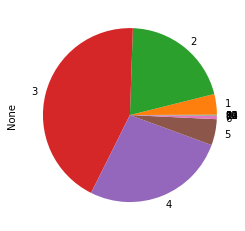

In [29]:
data.groupby('property_beds').size().plot(kind='pie')

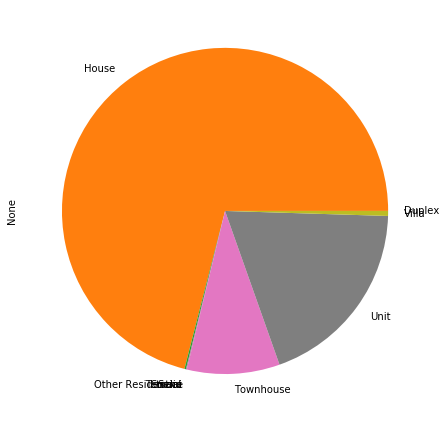

In [96]:
data.groupby('property_type').size().plot(kind='pie')

## By suburb

In [70]:
sales_volume_by_suburb = data.groupby('suburb_name').size()

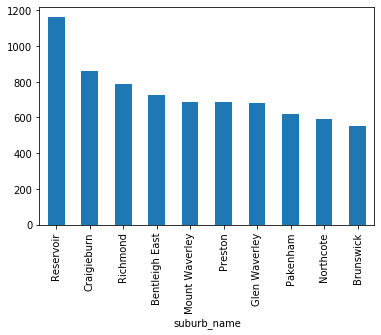

In [71]:
# The top and bottom 10 suburb by volumes
sales_volume_by_suburb.nlargest(10).plot(kind='bar')

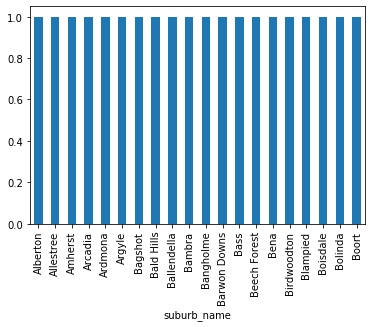

In [72]:
sales_volume_by_suburb.nsmallest(20).plot(kind='bar')

In [88]:
# The top and bottom 10 suburb by avg prices
mean_price_by_suburb = data[data['outcome_price']>0].groupby('suburb_name')['outcome_price'].mean()

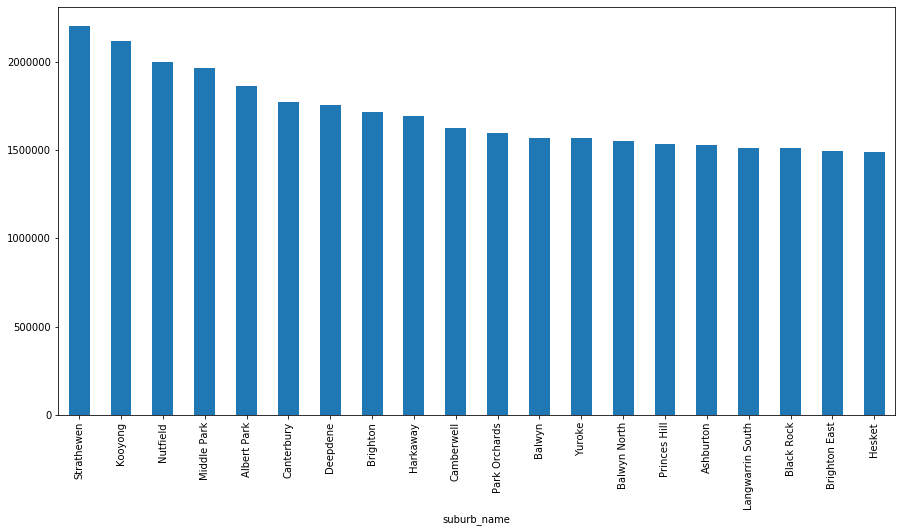

In [89]:
mean_price_by_suburb.nlargest(20).plot(kind='bar')

In [84]:
# Some suburbs sound not familiarr, it can be the case that these suburbs sale prices are outliers with low volumes.
data[data['suburb_name'].isin(['Nutfield','Strathewen','Harkaway'])]

,address,agent,date,domain_link,outcome_price,outcome_sold,property_beds,property_type,suburb_name,price_availalbe
10712,610 Hurstbridge-Arthurs Creek Rd,NaN,2018-05-12,https://www.domain.com.au/610-hurstbridge-arth...,2000000.0,Private exchange,4,House,Nutfield,True
15033,5-6 Marks Ct,Century 21 Radar Properties,2018-06-02,https://www.domain.com.au/5-6-marks-court-hark...,1920000.0,Private exchange,4,House,Harkaway,True
17248,15-17 Baker Rd,Century 21 Radar Properties,2018-06-16,https://www.domain.com.au/15-17-baker-road-har...,1300000.0,Sold after auction,5,House,Harkaway,True
52908,152 Odeas Rd,Morrison Kleeman Estate Agents,2019-03-23,https://www.domain.com.au/152-o-deas-road-stra...,2200000.0,Private exchange,4,House,Strathewen,True
79459,224-232 Harkaway Rd,O'Brien Real Estate Berwick,2020-02-01,https://www.domain.com.au/224-232-harkaway-roa...,1855000.0,Sold,4,House,Harkaway,True


In [92]:
# So now we only consider suburbs with more than 20 sales in 2 years.
mean_price_by_suburb = mean_price_by_suburb.to_frame(name='mean_price').join(sales_volume_by_suburb.to_frame(name='volume'))


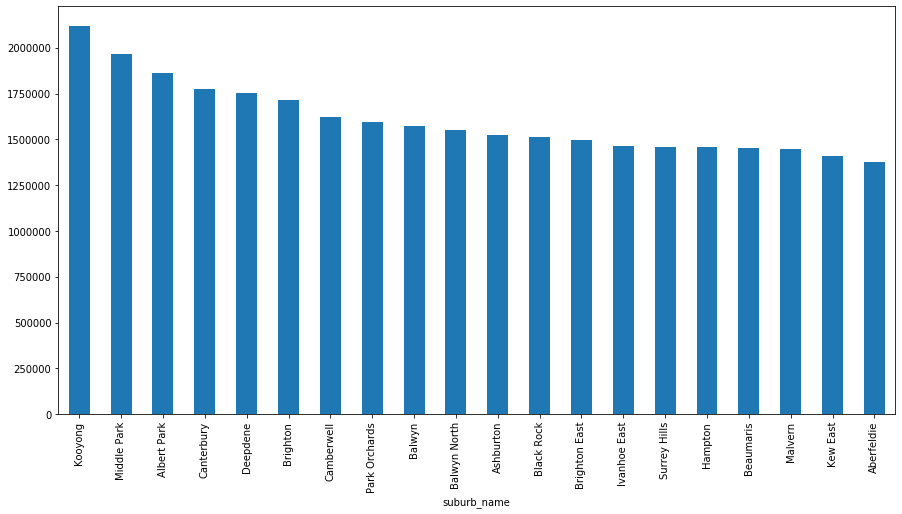

In [94]:
mean_price_by_suburb[mean_price_by_suburb['volume']>=20].nlargest(20,'mean_price')['mean_price'].plot(kind='bar')

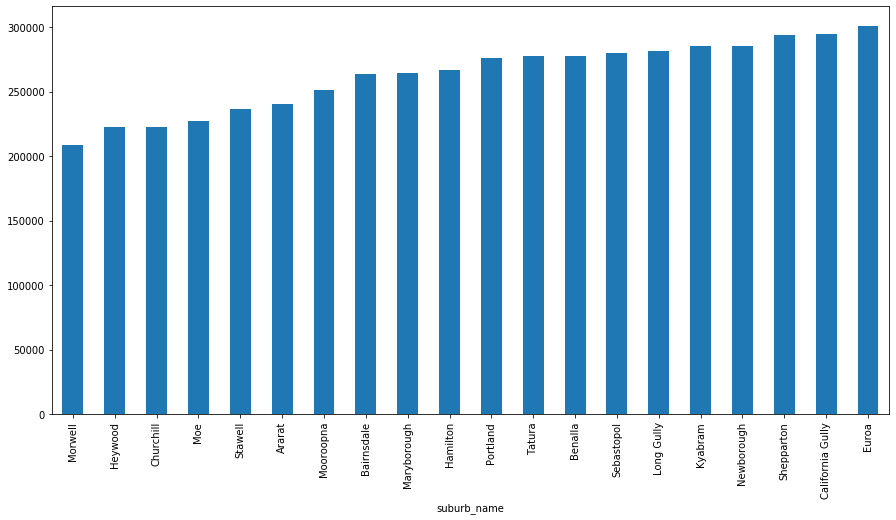

In [95]:
mean_price_by_suburb[mean_price_by_suburb['volume']>=20].nsmallest(20,'mean_price')['mean_price'].plot(kind='bar')

The mean prices above are aggregated by all types of properties. This might have potentially obscured the prices of some types of properties. Next let's drill down one further level and see the prices of each type.

For simplicity, let's focus on the three most popular types: house, unit, and townhouse.

In [131]:
data_sub = data[data['property_type'].isin(['House','Townhouse','Unit'])]

In [107]:
# How the prices change for different types of properties
volumes_by_sub_and_type = data_sub.groupby(['suburb_name','property_type']).size().unstack().fillna(0)
mean_price_by_sub_and_type = data_sub.groupby(['suburb_name','property_type'])['outcome_price'].mean().unstack().fillna(-1)

In [108]:
volumes_by_sub_and_type.head()

property_type,House,Townhouse,Unit
suburb_name,,,
Abbotsford,79.0,27.0,92.0
Aberfeldie,50.0,14.0,7.0
Aireys Inlet,14.0,0.0,0.0
Airport West,128.0,32.0,48.0
Albanvale,61.0,0.0,0.0


In [109]:
mean_price_by_sub_and_type.head()

property_type,House,Townhouse,Unit
suburb_name,,,
Abbotsford,669157.962025,665499.777778,416901.423913
Aberfeldie,733239.620000,434285.285714,182571.000000
Aireys Inlet,880999.928571,-1.000000,-1.000000
Airport West,541485.671875,290540.250000,402999.687500
Albanvale,462668.327869,-1.000000,-1.000000


In [110]:
mean_price_by_sub_and_type = mean_price_by_sub_and_type.join(volumes_by_sub_and_type,rsuffix='_vol')

In [111]:
mean_price_by_sub_and_type

property_type,House,Townhouse,Unit,House_vol,Townhouse_vol,Unit_vol
suburb_name,,,,,,
Abbotsford,6.691580e+05,6.654998e+05,416901.423913,79.0,27.0,92.0
Aberfeldie,7.332396e+05,4.342853e+05,182571.000000,50.0,14.0,7.0
Aireys Inlet,8.809999e+05,-1.000000e+00,-1.000000,14.0,0.0,0.0
Airport West,5.414857e+05,2.905402e+05,402999.687500,128.0,32.0,48.0
Albanvale,4.626683e+05,-1.000000e+00,-1.000000,61.0,0.0,0.0
Albert Park,8.292276e+05,1.056250e+06,440971.944444,136.0,4.0,18.0
Alberton,4.600000e+05,-1.000000e+00,-1.000000,1.0,0.0,0.0
Albion,4.126575e+05,3.722725e+05,241757.903226,57.0,22.0,31.0
Alexandra,3.516508e+05,-1.000000e+00,205000.000000,20.0,0.0,1.0


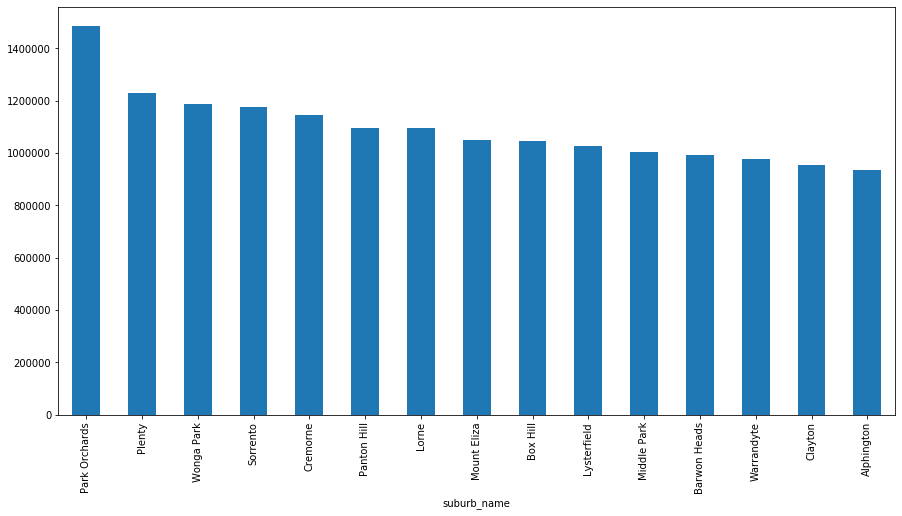

In [113]:
mean_price_by_sub_and_type[mean_price_by_sub_and_type['House_vol']>10]['House'].nlargest(15).plot(kind='bar')

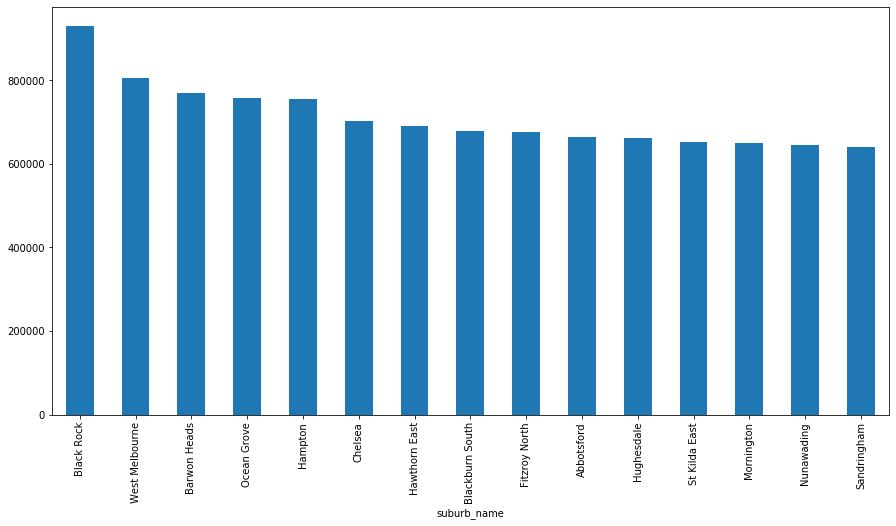

In [114]:
mean_price_by_sub_and_type[mean_price_by_sub_and_type['Townhouse_vol']>10]['Townhouse'].nlargest(15).plot(kind='bar')

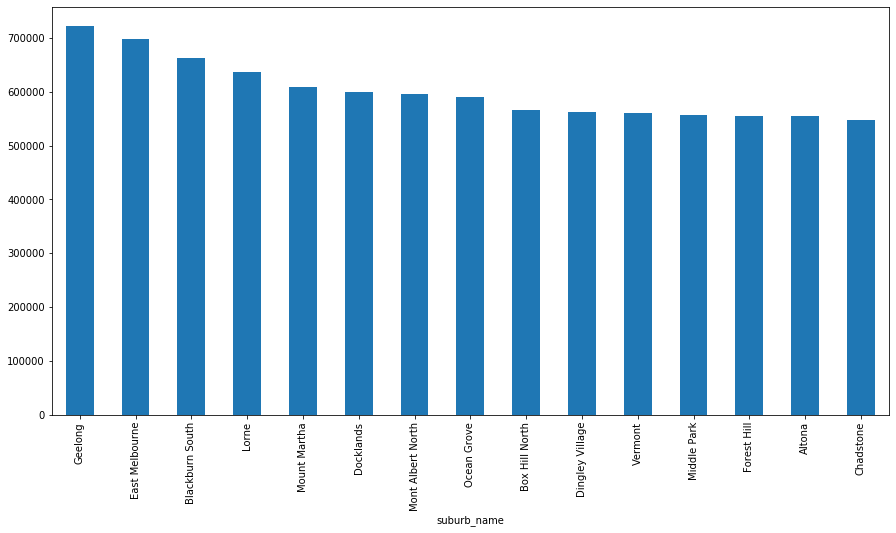

In [115]:
mean_price_by_sub_and_type[mean_price_by_sub_and_type['Unit_vol']>10]['Unit'].nlargest(15).plot(kind='bar')

### A look into the most 15 busiest suburbs

In [116]:
mean_price_by_sub_and_type['total_vol'] = mean_price_by_sub_and_type['House_vol'] + mean_price_by_sub_and_type['Townhouse_vol'] + mean_price_by_sub_and_type['Unit_vol']


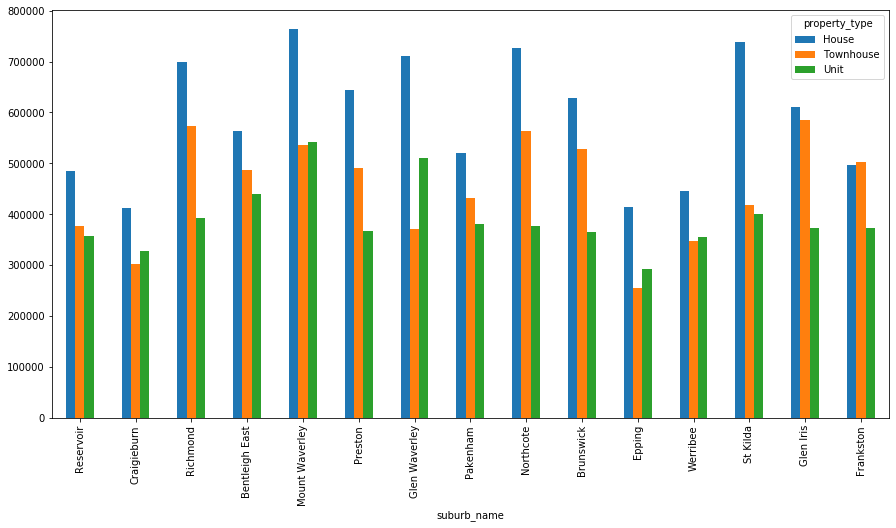

In [121]:
mean_price_by_sub_and_type.nlargest(15,'total_vol').plot(kind='bar',y=['House','Townhouse','Unit'])

## Price trend

This section looks at the price trend over the last 2 years.

In [144]:
data_sub.date.dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
82347    2020
82348    2020
82349    2020
82350    2020
82351    2020
Name: date, Length: 81551, dtype: int64

In [149]:
price_trend_by_week = data_sub[data_sub['price_available']==True].groupby(by=[data_sub.date.dt.year,data_sub.date.dt.month,data_sub.property_type])['outcome_price'].mean().unstack()

In [150]:
price_trend_by_week

property_type         House      Townhouse           Unit
date date                                                
2018 4         7.227280e+05  726606.198511  530104.071263
     5         7.893026e+05  798661.561462  547391.495204
     6         7.149047e+05  775776.696165  529426.576410
     7         6.898939e+05  724165.158371  526301.520000
     8         7.317872e+05  761949.358974  535922.591099
     9         7.674609e+05  774398.435606  545059.319359
     10        7.421031e+05  770610.555133  562922.766129
     11        9.531871e+05  797000.000000  608430.128205
     12        9.491537e+05  773226.136364  553231.164444
2019 2         7.682150e+05  769908.729730  533461.537849
     3         8.306981e+05  812418.050633  547853.426506
     4         9.007255e+05  884304.564706  580186.250000
     5         7.449058e+05  713142.549708  542393.826923
     6         7.618281e+05  790776.422111  536669.969147
     7         7.474939e+05  794916.788321  579161.253644
     8         8.667933e+05  835423.147860  590924.677419
     9         1.052776e+06  905589.037037  658079.650000
     10        1.063175e+06  884649.707763  664021.795580
     11        1.059640e+06  947019.166667  678329.527495
     12        1.044476e+06  929136.938650  627429.099338
2020 2         8.516815e+05  862481.678218  610491.834043

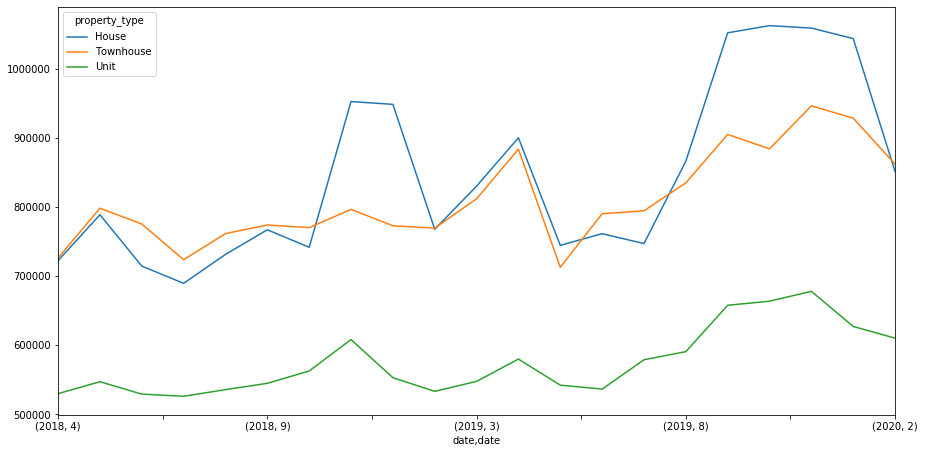

In [152]:
price_trend_by_week.plot(kind='line')

It looks like the prices are going up. A clearer way to display this is to take the first month as 100%, and display the other prices relatively.

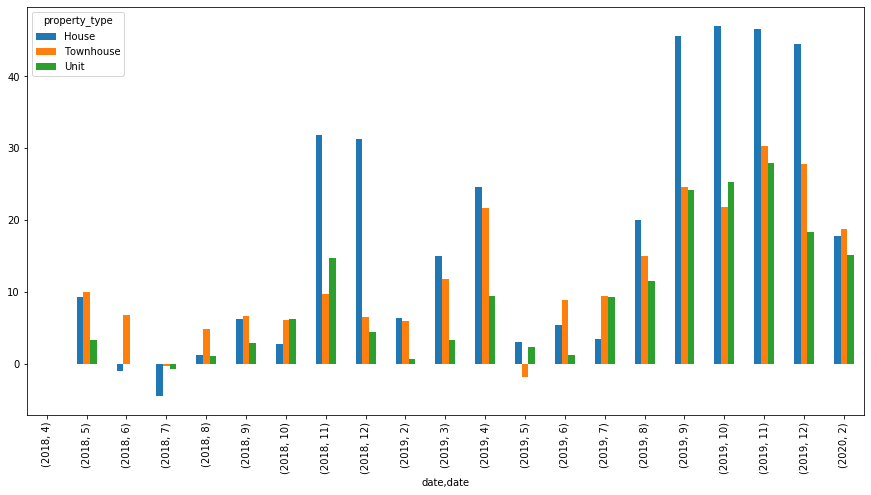

In [158]:
(price_trend_by_week/price_trend_by_week.iloc[0]*100-100).plot(kind='bar')

## Auction rates

One interesting aspect to look at is the clearance rate, which is defined as the ratio between the number of sales {at auction, before or after auction} and the total number of auctions (the above plus passed in properties). The clearance rate can be computed on a weekly basis on the entire state level. On suburb level, the sale volumes can be not high enough to do this.

In [165]:
data_sub['outcome_sold'].unique()

array(['Sold prior to auction', 'Sold', 'Private exchange', 'Passed in',
       'Sold after auction'], dtype=object)

In [177]:
clearance_rate = data_sub.groupby('date').apply(lambda x: x[x['outcome_sold'].isin(['Sold prior to auction', 'Sold', 'Sold after auction'])].shape[0]/
                                        x[x['outcome_sold']!='Private exchange'].shape[0]*100
                              ).to_frame(name='clearance_rate')

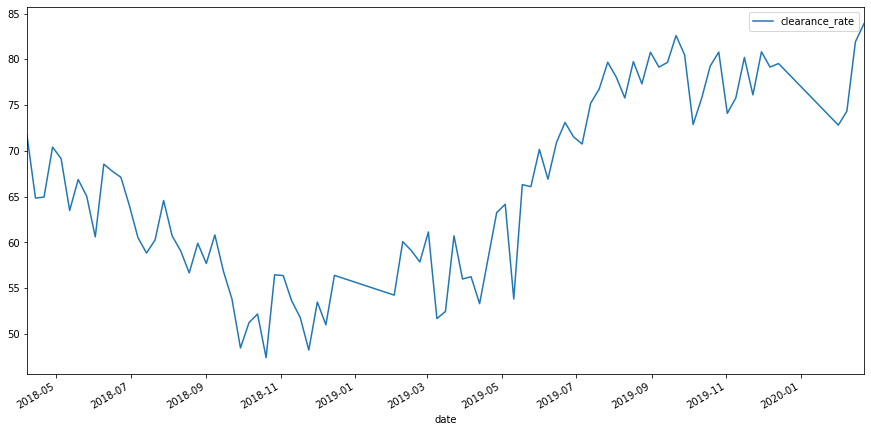

In [179]:
clearance_rate.plot(kind='line')

## Summary

1. The dataset has 82K records of auction events in Melbourne, 25K of them do not have prices (either sales did not happen or prices are disclosed).
1. The attributes that are available about the properties are only number of beds, property types, suburb, address, sale prices. It is potentially feasible to derive some other useful attributes based on address, such as distance to nearest train stations/supermarkets, etc. but these are not immediately available.
1. Three most popular types of properties are House, Townhouse, Unit. Three most popular values of number of bedrooms are 2, 3, and 4.
1. There are no data for the last week of December till first month of Feb.
1. The prices are going up, with the best increases for House, then Townhouse, and Unit. The increases are more significant in the second half of 2019.
1. The clearance rates are going up, with the bottoms observed at the end of 2018.11. After 2019.05 (the election and the rate cut), clearance rates are significantly increase.

# Next

The available information above might not be helpful enough to give more insights into the prices of the house. Other important features that arguably affect house prices are: land area, floor area, is it recently renovated, etc. These features are available and can also be extracted from the listings?